![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [12]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

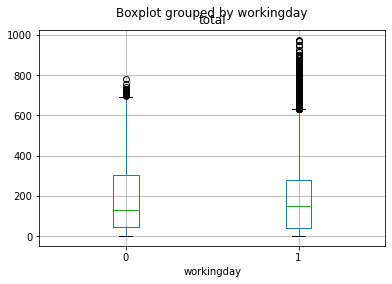

In [20]:
bikes.boxplot(column='total',by='workingday')

In [9]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

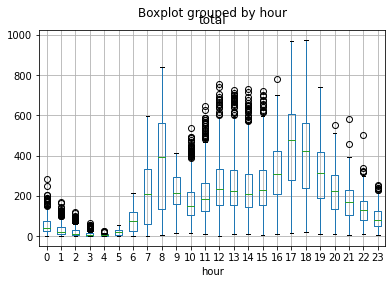

In [21]:
bikes.boxplot(column='total',by='hour')

A pesar de que la media de usuarios por hora por día es muy similar entre los dias laborales a los no laborales, su distribución es muy diferente, y se presentan mayores datos extremos en los días laborales.

En cuanto a la distribución de los datos por hora se presentan horas de mayor demanda de renta, que parecen ser los horarios de entrada y salida de oficina, y que entre dichas horas también se presenta en promedio un consumo constante, con gran cantidad de datos extremos.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

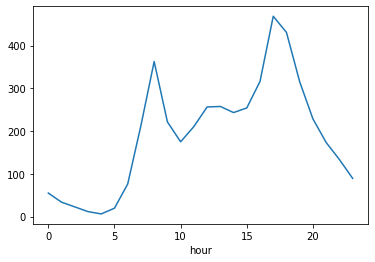

In [26]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

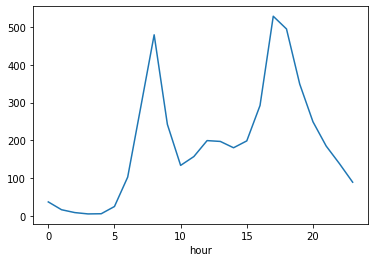

In [27]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes[bikes.workingday==1].groupby('hour').total.mean().plot.line()

De la información del análisis descriptivo de las variables 'workingday' y 'hour' se oberva que para los días laborales se presentan dos picos de usuarios durante el día, que corresponden de 7 a 9 de la mañana, y de 4 a 7 de la noche, horas de entrada a la oficina y de regreso a casa.

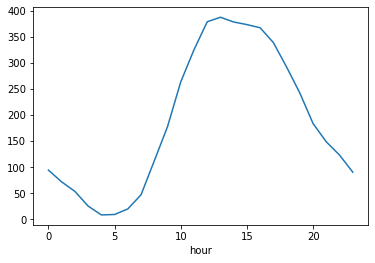

In [28]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes.workingday==0].groupby('hour').total.mean().plot.line()

 En el caso de días no laborales, el pico de usuarios se presenta entre las 10 de la mañana y 6 de la tarde, que haría pensar que son usuarios que rentan por deporte o por recreación.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [33]:
# Celda 3
from sklearn.linear_model import LinearRegression
X= bikes[['hour','workingday']]
y=bikes['total']
reg = LinearRegression().fit(X, y)
print(reg.feature_names_in_)
print(reg.coef_)


['hour' 'workingday']
[10.49206282  4.07248627]


En este caso las limitaciones del modelo de regresión lineal se presentan en la variable 'hour', ya que como se evidenció en el analisis descriptivo la relación entre hour y total no es lineal. el coeficiente de 10 en este caso quiere decir que por cada hora que se aumente, la variable total aumentará en 10 unidades, situación que no sucede en los datos iniciales. En el caso de workingday, al ser un día laboral aumenta en 4 el valor de la variable total, caso que tampoco es cierto en el analisis inicial de estas variables 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [84]:
# Celda 4
import numpy as np
def mse(y):
  # y=pd.DataFrame(y)
  if y.shape[0] == 0:
      return 0
  else:
      return ((y-y.mean())**2).mean()

def newmse(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    newmse_ = mse(y_l) + mse(y_r)
    
    return newmse_

In [89]:
def best_split(X, y):
    
    features = range(X.shape[1])
    
    best_split = [0, 0,-1]  # j, split, newmse
    
    # Para todas las varibles 
    for j in features:
        
        splits = X.iloc[:, j].unique().tolist()
        print(splits)
        # Para cada partición
        for split in splits:
            newmse1 = newmse(X.iloc[:, j], y, split)
            print(split)
            print(newmse1)          
            if newmse1 <= best_split[2] or best_split[2]==-1:
                best_split = [j, split, newmse1]
    
    return best_split

In [90]:
prueba=best_split(X,y)
prueba

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
0
32810.29888623418
1
35209.802852665765
2
35143.284499001624
3
34839.74071113478
4
34205.71677890031
5
33221.7624761003
6
32157.94531800418
7
32643.141379297136
8
39489.82209392284
9
51762.72861859943
10
53302.91259010495
11
53617.942888286794
12
54956.12495126873
13
57263.69409308019
14
59405.515277136146
15
61291.17884627047
16
63613.58085171358
17
66907.82594615823
18
63285.273510429266
19
53834.966783546915
20
46939.266166845024
21
42285.80379313742
22
39032.20573452002
23
36313.72065837038
[0, 1]
0
32810.29888623418
1
64212.04320568936


[0, 6, 32157.94531800418]

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de clasificación y compare desempeño con el modelo del punto 3.

In [ ]:
# Celda 5


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir la cantidad de reacciones en redes sociales (popularidad) de la notica. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [ ]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

In [ ]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

In [ ]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 6


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 7


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9